# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell!

Student Full Name: Sai Nikhil Kanchukatla

ID:1002034488

Net ID:sxk4489

Team Mate name :Sampath Kumar Medipudi

ID:1002032901

Net ID:sxm2901

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files . 

The target variable for the clustering dataset is column "class" which should be(<=50 k and >50k).

The target variable for the college dataset is column "Grad.Rate" which should be (<=50k and >50k )




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [19]:
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

# Preprocessing data

In [20]:
#reading the csv file
dataframe = pd.read_csv('clusteringdata.csv')

In [21]:
#printing dataframe
dataframe

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [22]:
#Looking for null values
#Null values have to be discarded in the pre-processing stage
dataframe.isna().sum()

Age                0
WorkClass          0
Fnlwght            0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Class              0
dtype: int64

From above we can interpt , null values not exists in the dataset

In [23]:
#top 5 rows of dataframe
dataframe.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
#Encode target labels with value between 0 and n_classes-1 using labelEncoder()
#converting every column string to int values
le = LabelEncoder()
Class = le.fit_transform(dataframe.Class)
dataframe["Class"]=Class
NativeCountry = le.fit_transform(dataframe.NativeCountry)
dataframe["NativeCountry"]=NativeCountry
Sex= le.fit_transform(dataframe.Sex)
dataframe["Sex"]=Sex
Race= le.fit_transform(dataframe.Race)
dataframe["Race"]=Race
Relationship= le.fit_transform(dataframe.Relationship)
dataframe["Relationship"]=Relationship
Occupation= le.fit_transform(dataframe.Occupation)
dataframe["Occupation"]=Occupation
Education= le.fit_transform(dataframe.Education)
dataframe["Education"]=Education
WorkClass= le.fit_transform(dataframe.WorkClass)
dataframe["WorkClass"]=WorkClass
MaritalStatus= le.fit_transform(dataframe.MaritalStatus)
dataframe["MaritalStatus"]=MaritalStatus

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

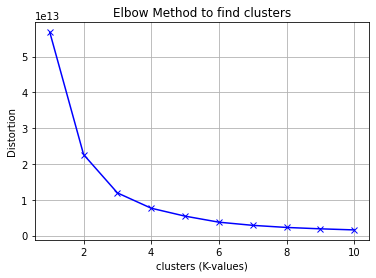

We must choose the value of k at the elbow, or the point where the line graph begins to decrease linearly, to find the best number of clusters.
As a result, we can deduce that the best value for k is 3.


In [25]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
#vector to store  sum of squared errors for k values (k belongs to 1 to 10)
sse = []
range_values = range(1,11) 
for k in range_values:
    kmeans = KMeans(n_clusters = k, max_iter=1000).fit(dataframe)
    sse.append(kmeans.inertia_)
    
#ploting the graph -- on x-axis k value cluster and on y-axis distortion 
plt.plot(range_values, sse,'bx-')
plt.xlabel('clusters (K-values)')
plt.ylabel('Distortion')
plt.title('Elbow Method to find clusters')
plt.grid('True')
plt.show()

print("We must choose the value of k at the elbow, or the point where the line graph begins to decrease linearly, to find the best number of clusters.")
print("As a result, we can deduce that the best value for k is 3.")

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [26]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!

#spliting the dataset 70% for training and 30% for testing with random_state 2022
X_train = dataframe.sample(frac=0.70, random_state=2022)
X_test = dataframe.drop(X_train.index)
y_train = X_train.pop('Class')
y_test = X_test.pop('Class')

###################end code for Task 1-b-1

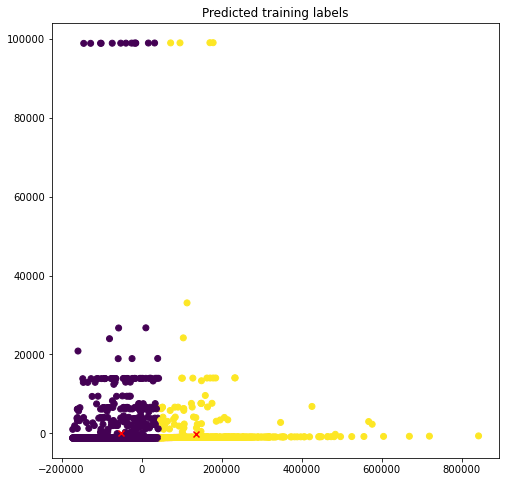

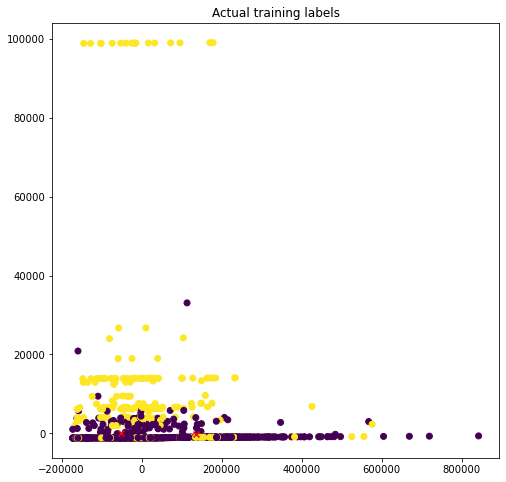

In [27]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Importing PCA
from sklearn.decomposition import PCA


# Creating the KMeans model and fitting the model
kmeans = KMeans(n_clusters=2, random_state=2022).fit(X_train)

# Computing cluster centers and predict cluster index for each sample 
index=kmeans.predict(X_train)

# Model and fitting the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualizing the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_train_pca)

#plotting scatter plot for predicted training labels
plt.figure(figsize=(8,8))
plt.title("Predicted training labels")
plt.scatter(x,y,c=index)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='x',
            c='red',
            label='centroids')


plt.show()


#plotting scatter plot for actual training labels
plt.figure(figsize=(8,8))
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='x',
            c='red',
            label='centroids')
plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

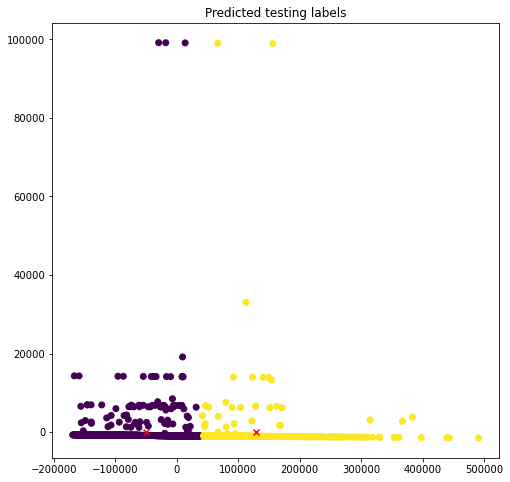

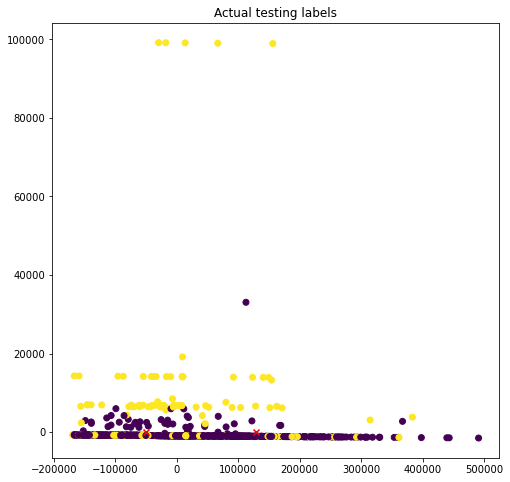

Using the Trained Model from the previous step, 

Applying pca for 2 components using the dataset and choosing k = 2 
we get the above scatter plots where cluster centers are computed for 
Predicted Testing Labels


In [28]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
kmeans = KMeans(n_clusters=2, random_state=2022).fit(X_test)

# predicting  cluster index for each sample 
index1=kmeans.predict(X_test)

# Model and fitting the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

y_Train_Pred= kmeans.fit_predict(X_test_pca)

#plotting predicted testing labels
plt.figure(figsize=(8,8))
plt.title("Predicted testing labels")
plt.scatter(x,y,c=index1)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='x',
            c='red',
            label='centroids')

plt.show()

#Plotting actual testing labels
plt.figure(figsize=(8,8))
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
             marker='x',
            c='RED',
            label='centroids')
plt.show()

print("Using the Trained Model from the previous step, \n")
print("Applying pca for 2 components using the dataset and choosing k = 2 \nwe get the above scatter plots where cluster centers are computed for \nPredicted Testing Labels")


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [29]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print("Confusion matrix for training data \n",confusion_matrix(y_train,index))
print("Confusion matrix for testing data \n",confusion_matrix(y_test,index1))
###################end code for Task 1-b-4

Confusion matrix for training data 
 [[1902  731]
 [ 650  217]]
Confusion matrix for testing data 
 [[803 343]
 [276  78]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [31]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculating pairwise distance matrix for X_train
## Model and fitting the training data to the AgglomerativeClustering model with complete linkage + cosine
pdm_train = X_train
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
cosine = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
pred_cosine = cosine.fit_predict(cosine_distance)
f1_cosine = f1_score(y_train, pred_cosine, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fitting the training data to the AgglomerativeClustering model with complete linkage + euclidean
euc_distance = pairwise_distances(pdm_train, metric='euclidean')
euclidean = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
pred_euc = euclidean.fit_predict(euc_distance)
f1_euclidean = f1_score(y_train, pred_euc, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fitting the training data to the AgglomerativeClustering model with complete linkage + manhattan
man_distance = pairwise_distances(pdm_train, metric='manhattan')
manhattan = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
pred_man = manhattan.fit_predict(man_distance)
f1_manhattan = f1_score(y_train, pred_man, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model with average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
pred_cosine_avg = cosine_avg.fit_predict(cosine_distance)
f1_cosine_avg = f1_score(y_train, pred_cosine_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model with average linkage + euclidean
euclidean_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
pred_euclidean_avg = euclidean_avg.fit_predict(euc_distance)
f1_euclidean_avg = f1_score(y_train, pred_euclidean_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model with average linkage + manhattan
manhattan_avg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
pred_manhattan_avg = manhattan_avg.fit_predict(man_distance)
f1_manhattan_avg = f1_score(y_train, pred_manhattan_avg, labels=None, pos_label=1, average='weighted', sample_weight=None)

print("F1-score for complete linkage + cosine", f1_cosine)
print("F1-score for complete linkage + euclidean", f1_euclidean)
print("F1-score for complete linkage + manhattan", f1_manhattan)
print("F1-score for average linkage + cosine", f1_cosine_avg)
print("F1-score for average linkage + euclidean", f1_euclidean_avg)
print("F1-score for average linkage + manhattan", f1_manhattan_avg)


###################end code for Task 2-a

F1-score for complete linkage + cosine 0.6493056053642863
F1-score for complete linkage + euclidean 0.6466337585305059
F1-score for complete linkage + manhattan 0.1716930612244898
F1-score for average linkage + cosine 0.09776482254668942
F1-score for average linkage + euclidean 0.12469713964506461
F1-score for average linkage + manhattan 0.10625675402824725


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

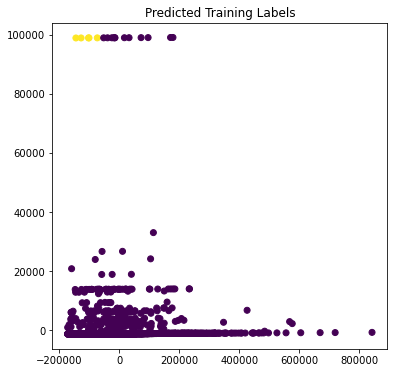

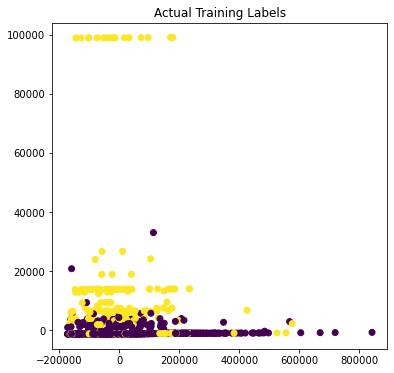

In [33]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualizing the predicted training labels versus actual training labels. 
models = {'pred_cosine':f1_cosine,
          'pred_euc':f1_euclidean,
          'pred_man':f1_manhattan,
          'pred_cos_avg':f1_cosine_avg,
          'pred_euc_avg':f1_euclidean_avg,
          'pred_man_avg':f1_manhattan_avg}
best_model_name = max(models,key=models.get)

if best_model_name == 'pred_cosine':
    best_model = pred_cosine

elif best_model_name == 'pred_euc':
    best_model = pred_euc

elif best_model_name == "pred_man":
    best_model = pred_man

elif best_model_name == 'cos_avg':
    best_model = cos_avg

elif best_model_name == 'euc_avg':
    best_model = euc_avg

elif best_model_name == 'man_avg':
    best_model = man_avg
else:
    best_model = None

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualizing the predicted training labels versus actual training labels. 
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Plotting for Predicted Training labels
plt.figure(figsize=(6,6))
plt.title("Predicted Training Labels")
plt.scatter(x,y, c=best_model)
plt.show()

# Plotting for Actual Training labels
plt.figure(figsize=(6,6))
plt.title("Actual Training Labels")
plt.scatter(x,y, c=y_train)
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

best model man_comp


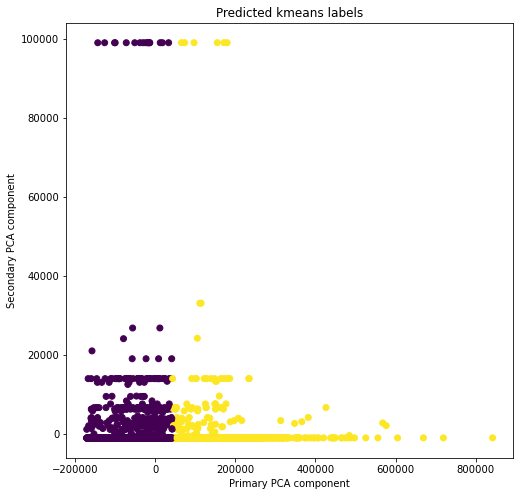

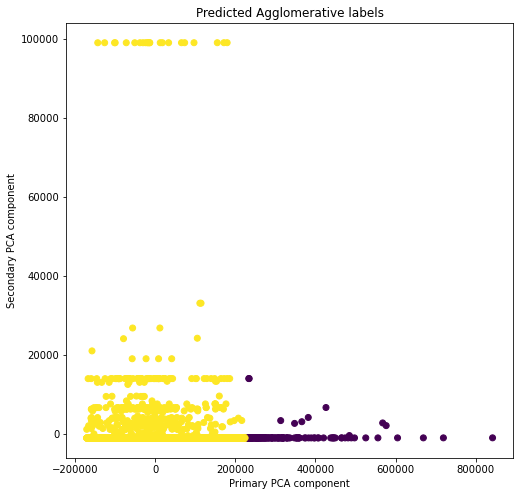

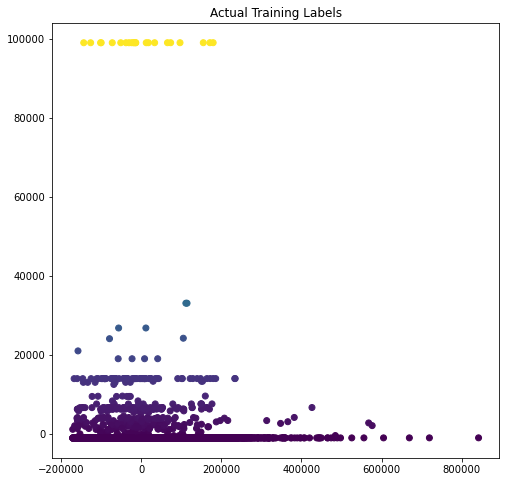

The best model for Hierarchical Agglomerative Clustering is with Manhatten and Complete Linkage Method



In [34]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fitting the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = dataframe[dataframe.columns[:-1]]
y = dataframe[dataframe.columns[-1]]

kmeans_data = KMeans(n_clusters=2,random_state=2022)
kmeans_data_fit = kmeans_data.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X by using cosine , euclidean and manhatten metric
cosine_distance = pairwise_distances(X,metric='cosine')
euclidean_distance = pairwise_distances(X,metric='euclidean')
manhattan_distance = pairwise_distances(X,metric='manhattan')

# Model and fitting the data to the Agglomerative by using fit_predict
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cos_comp_f1 = f1_score(y,cos_comp)
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euc_comp_f1 = f1_score(y,euc_comp)
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
man_comp_f1 = f1_score(y,man_comp)
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cos_avg_f1 = f1_score(y,cos_avg)
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euc_avg_f1 = f1_score(y,euc_avg)
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
man_avg_f1 = f1_score(y,man_avg)
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

#finding best model
if best_model_val == 'cos_comp':
    best_model = cos_comp
elif best_model_val == 'euc_comp':
    best_model = euc_comp
elif best_model_val == 'man_comp':
    best_model = man_comp
elif best_model_val == 'cos_avg':
    best_model = cos_avg   
elif best_model_val == 'euc_avg':
    best_model = euc_avg
elif best_model_val == 'man_avg':
    best_model = man_avg
else:
    best_model = None
print("best model" ,best_model_val)


### Visualizing Clusters
#  Model and fitting the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]
plt.figure(figsize=(8,8))

# Visualizing the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
#plotting predicted kmeans labels
plt.scatter(x,y,c=kmeans_data_fit)
plt.title("Predicted kmeans labels")
plt.xlabel("Primary PCA component")
plt.ylabel("Secondary PCA component")
plt.show()

#plotting predicted agglomerative labels
plt.figure(figsize=(8,8))
plt.scatter(x,y,c=best_model)
plt.title("Predicted Agglomerative labels")
plt.xlabel("Primary PCA component")
plt.ylabel("Secondary PCA component")
plt.show()

#Plotting actual training labels
plt.figure(figsize=(8,8))
plt.title("Actual Training Labels")
plt.scatter(x,y,c=y)#actual
plt.show()

print("The best model for Hierarchical Agglomerative Clustering is with Manhatten and Complete Linkage Method\n")

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [35]:
###################begin code for Task 3-b
X = dataframe[dataframe.columns[:-1]]
y = dataframe[dataframe.columns[-1]]
#confusion matrix 
print("Confusion matrix\n")
kmeans_confusion_matrix = confusion_matrix(y,kmeans_data_fit)
agglo_confusion_matrix = confusion_matrix(y,best_model)
print("Kmeans:")
print(kmeans_confusion_matrix)
print("\nAgglomerative:")
print(agglo_confusion_matrix)

#precision
print("\nPrecision")
kmeans_precision = precision_score(y,kmeans_data_fit)
agglo_precision = precision_score(y,best_model)
print("Kmeans:")
print(kmeans_precision)
print("Agglomerative:")
print(agglo_precision)

#recall
print("\nRecall")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y,best_model)
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)

#f1 score
print("\nF1 Score")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y,best_model)
print("Kmeans:")
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)

#accuracy
print("\nAccuracy of kmeans:",metrics.accuracy_score(y,kmeans_data_fit))
print("Accuracy of agglomerative :",metrics.accuracy_score(y,best_model))
###################end code for Task 3-b

Confusion matrix

Kmeans:
[[2712 1067]
 [ 927  294]]

Agglomerative:
[[ 130 3649]
 [  27 1194]]

Precision
Kmeans:
0.216017634092579
Agglomerative:
0.24654139995870328

Recall
Kmeans:
0.24078624078624078
Agglomerative:
0.9778869778869779

F1 Score
Kmeans:
0.22773044151820293
Agglomerative:
0.39379947229551454

Accuracy of kmeans: 0.6012
Accuracy of agglomerative : 0.2648


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points

# References



https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/